In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f0454c7710>,
 'id': 1,
 'prcp': 0.08,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397'}

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
dt.date(2017, 8, 23) - dt.timedelta(days=365)

datetime.date(2016, 8, 23)

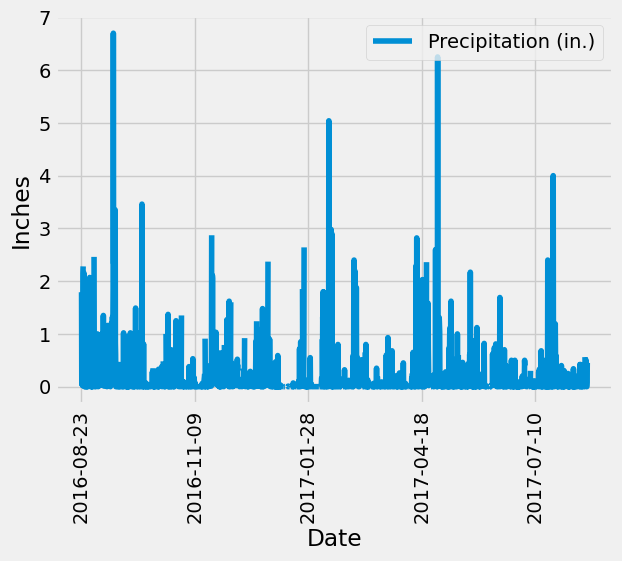

In [28]:
# Perform a query to retrieve the data and precipitation scores
start_date = dt.datetime(2016, 8, 22)
end_date = dt.datetime(2017, 8, 23)
prcp_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between(start_date, end_date)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_scores_df = pd.DataFrame(prcp_scores, columns=['Date', 'Precipitation (in.)'])

# Sort the dataframe by date
prcp_scores_df.sort_values(by='Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
# Create a bar chart
prcp_scores_df.plot(x = 'Date', y ='Precipitation (in.)', rot=90)

# Set labels and legend
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = prcp_scores_df['Precipitation (in.)'].describe()
summary_statistics

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation (in.), dtype: float64

# Exploratory Station Analysis

In [14]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f04a2e67b0>,
 'id': 1,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'elevation': 3.0}

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations_df = pd.read_sql_query("SELECT station, COUNT(station) AS 'Station Count' FROM measurement GROUP BY station ORDER BY COUNT(station) DESC ", engine)
active_stations_df

,station,Station Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures_df = pd.read_sql_query("SELECT station, MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement WHERE station = 'USC00519281'", engine)
temperatures_df

,station,MIN(tobs),MAX(tobs),AVG(tobs)
0,USC00519281,54.0,85.0,71.663781


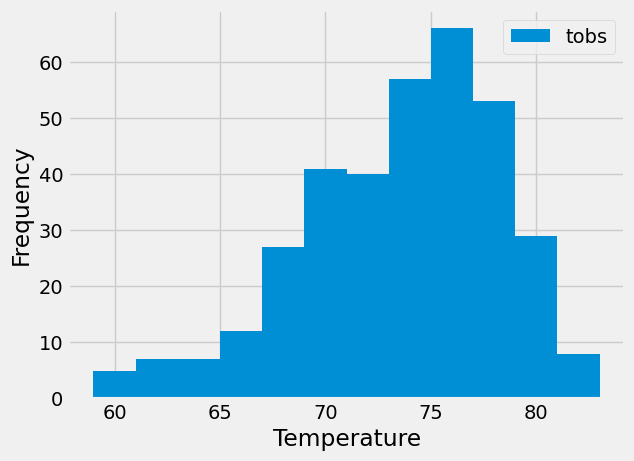

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
start_date = dt.datetime(2016, 8, 22)
end_date = dt.datetime(2017, 8, 23)
temps = session.query(Measurement.tobs).\
    filter(Measurement.date.between(start_date, end_date)).\
    filter(Measurement.station == 'USC00519281').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
temps_df = pd.DataFrame(temps, columns=['Temperature'])

plt.hist(temps_df, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close Session

In [19]:
# Close Session
session.close()